In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will be looking at the data "2016 Global Ecological Footprint" from Kaggle: https://www.kaggle.com/footprintnetwork/ecological-footprint. Take a minute to read the description, then download it. You can also read more about the data from the source, https://www.footprintnetwork.org/ .

In [ ]:
#If you are using Google Colab, run the following:
from google.colab import files
uploaded = files.upload()
import io
countries = pd.read_csv(io.BytesIO(uploaded['countries.csv']))

#If you are using Jupyter Notebook, uncomment and run the following (make sure data is in the same directory/folder as the notebook)
#countries = pd.read_csv("countries.csv")import pandas as pd

Saving countries.csv to countries (2).csv


In [ ]:
countries = countries.dropna()

In [ ]:
countries.describe()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,42.671148,0.684406,0.594568,0.266111,0.378580,1.81179,0.118580,3.239877,0.55358,0.478704,2.013580,0.495556,0.069877,3.611852,0.371975,1.870926,3.641116
std,150.985363,0.156538,0.356724,0.357867,0.361099,1.93988,0.151645,2.351122,0.68702,1.044160,8.126784,1.140204,0.055044,9.202288,9.223888,1.358278,12.786377
min,0.050000,0.340000,0.100000,0.000000,0.010000,0.00000,0.000000,0.420000,0.00000,0.000000,0.000000,0.000000,0.000000,0.050000,-14.140000,0.240000,0.050000
25%,3.332500,0.552500,0.352500,0.090000,0.170000,0.39000,0.020000,1.415000,0.20250,0.040000,0.060000,0.030000,0.040000,0.710000,-1.825000,0.815000,0.927500
50%,9.700000,0.720000,0.525000,0.180000,0.270000,1.10000,0.070000,2.680000,0.36000,0.120000,0.340000,0.110000,0.050000,1.415000,-0.680000,1.550000,1.665000
75%,29.675000,0.800000,0.717500,0.315000,0.460000,2.59500,0.140000,4.425000,0.59750,0.340000,1.177500,0.365000,0.090000,2.867500,0.337500,2.560000,2.557500
max,1408.040000,0.930000,2.680000,3.470000,3.030000,12.65000,0.810000,15.820000,5.42000,8.230000,81.520000,8.270000,0.270000,89.330000,85.080000,9.140000,159.470000


Histogram

(array([86., 33., 20., 14.,  4.,  3.,  0.,  1.,  0.,  1.]),
 array([ 0.   ,  1.265,  2.53 ,  3.795,  5.06 ,  6.325,  7.59 ,  8.855,
        10.12 , 11.385, 12.65 ]),
 <a list of 10 Patch objects>)

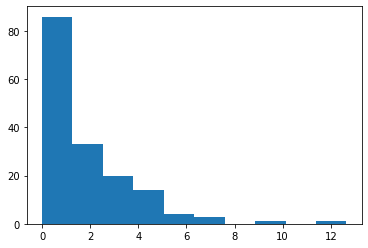

In [ ]:
#Creating a histogram using the matplotlib library
plt.hist(countries['Carbon Footprint'])

Scatterplot

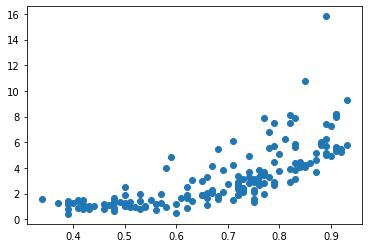

In [ ]:
plt.scatter(x=countries['HDI'], y=countries['Total Ecological Footprint'])

Pairplot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


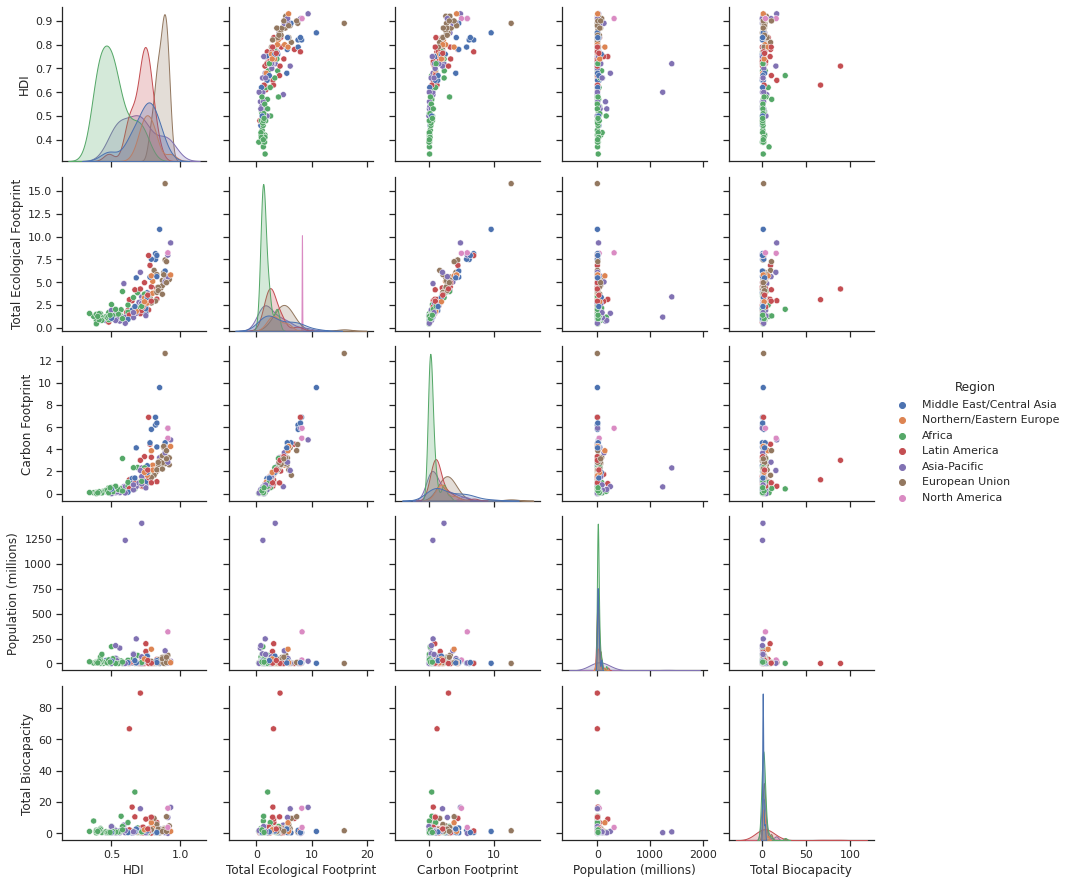

In [ ]:
smaller_df = countries[['Region', 'HDI', 'Total Ecological Footprint', 'Carbon Footprint', 'Population (millions)', 'Total Biocapacity' ]]
smaller_df.head(1)
#Creating a graph using the seaborn library
sns.set_theme(style="ticks")
sns.pairplot(smaller_df, hue = 'Region')

Correlation Matrix & Plot

In [ ]:
smaller_df = countries[['Population (millions)', 'HDI', 'Urban Land', 'Total Ecological Footprint', 'Carbon Footprint', 'Total Biocapacity', 'Cropland', 'Urban Land', 'Fishing Water']]
corrMatrix = smaller_df.corr()
print(corrMatrix)

                            Population (millions)  ...  Fishing Water
Population (millions)                    1.000000  ...      -0.079783
HDI                                      0.001089  ...       0.129884
Urban Land                               0.051354  ...       0.079015
Total Ecological Footprint              -0.050838  ...       0.243326
Carbon Footprint                        -0.020418  ...       0.182334
Total Biocapacity                       -0.057019  ...       0.705092
Cropland                                 0.005595  ...       0.209708
Urban Land                               0.051354  ...       0.079015
Fishing Water                           -0.079783  ...       1.000000

[9 rows x 9 columns]


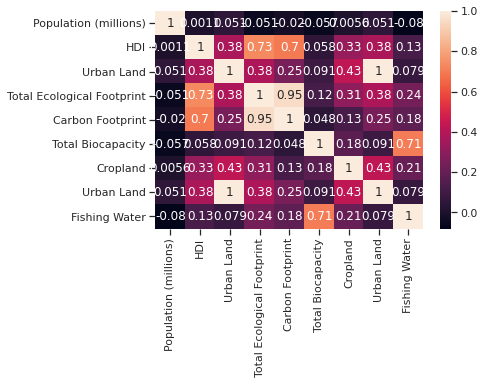

In [ ]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Create a Scatter Plot with Multiple Variables

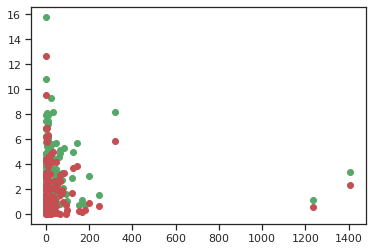

In [ ]:
from sklearn import preprocessing


# defining the plot
pairplot = plt.gca()



#add in each variable in the format plot.scatter(x variable, y variable, color)
pairplot.scatter(countries['Population (millions)'], (countries[['Total Ecological Footprint']]), color = "g")
pairplot.scatter(countries['Population (millions)'], (countries[['Carbon Footprint']]), color = "r")


# attempts to normalize the y data
#y1 = countries['Total Ecological Footprint']
#y1 = y1.to_numpy()
#y1.reshape(-1, 1)

#y1 = preprocessing.normalize(y1)
#pairplot.scatter(countries['Population (millions)'], y1, color = "g")
#print(y1)


Single Linear Regression Analysis

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:

x = countries[['HDI']]
x = x.to_numpy()


y = countries[['Total Ecological Footprint']]
y = y.to_numpy()


In [ ]:

#Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using from the x,y datasets
regr.fit(x,y)

# Calculated predicted data from the regression
predicted_y = regr.predict(x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, predicted_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, predicted_y))


Coefficients: 
 [[11.02908013]]
Mean squared error: 2.53
Coefficient of determination: 0.54


<function matplotlib.pyplot.show>

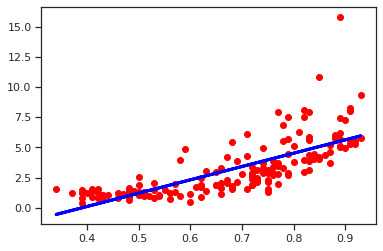

In [ ]:
# Plot outputs
plt.scatter(x, y,  color='red')
plt.plot(x, predicted_y, color='blue', linewidth=3)
plt.show

Multiple Regression Analysis

In [ ]:
# these x values are the predictors
x = countries[['Population (millions)', 'HDI', 'Carbon Footprint', 'Total Biocapacity', 'Cropland', 'Urban Land', 'Fishing Water']]
x = x.to_numpy()
#x = x.reshape(-1, 1)


# this y variable is the variable you want to predict with the predictors
y = countries['Total Ecological Footprint']
y = y.to_numpy()
y = y.reshape(-1, 1)

In [ ]:
#Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using from the x,y datasets
regr.fit(x,y)

# Calculated predicted data from the regression
predicted_y = regr.predict(x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, predicted_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, predicted_y))

Coefficients: 
 [[-5.43054445e-04  4.69692080e-01  1.81036167e+00  1.07497052e+00
   6.01905756e-03  4.91524982e-01  1.81036167e+00  4.39896455e-02]]
Mean squared error: 0.24
Coefficient of determination: 0.96
